In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.simplefilter("ignore", UserWarning)
import nelpy as nel
import nelpy.plotting as npl

In [2]:
prefix = '/home/kaylavokt/Desktop/Whrath/Day1/'
rec_list = ['preFamSleep', 'fam', 'postFamSleep', 'test', 'postTestSleep']

ripple_epochs = {}

for i in range(5):
    path = prefix + rec_list[i] + '_channels/ripple_epochs.npy'
    ripple_epochs[rec_list[i]] = np.load(path, allow_pickle=True)


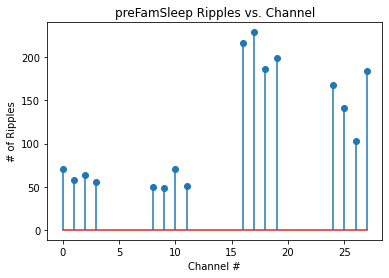

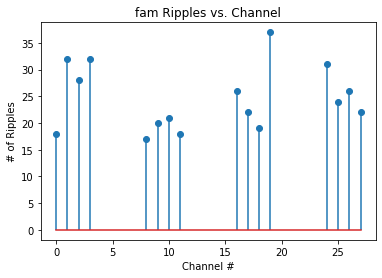

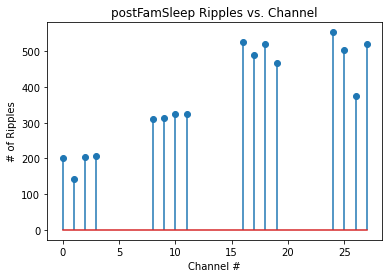

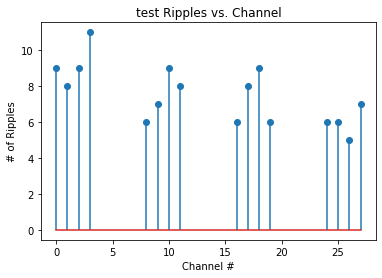

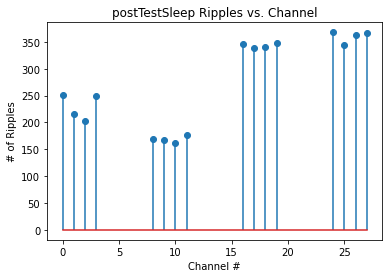

In [3]:
x = [0, 1, 2, 3, 8, 9, 10, 11, 16, 17, 18, 19, 24, 25, 26, 27]

for r in range(5):
    y = []
    for s in range(16):
        epoch = ripple_epochs[rec_list[r]][s]
        y.append(np.size(epoch.lengths))

    plt.stem(x, y)
    plt.title(str(rec_list[r]) + " Ripples vs. Channel")
    plt.xlabel("Channel #")
    plt.ylabel("# of Ripples")
    plt.show()

/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/home/kaylavokt/anaconda3/envs/analysis/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


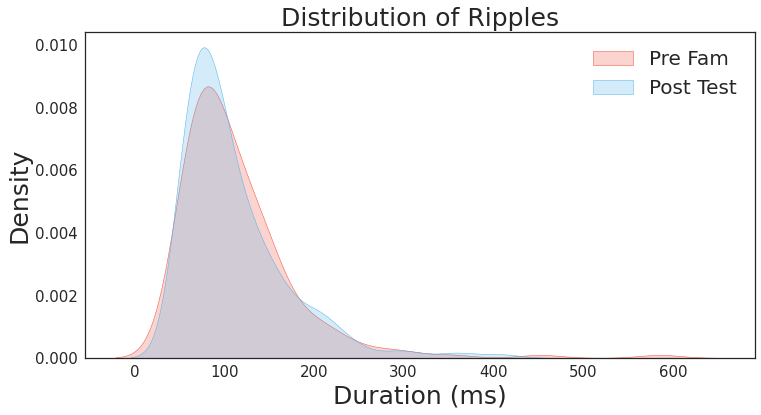

In [42]:
# Distribution of All Ripples
import seaborn as sns

preFam = ripple_epochs[rec_list[0]][15] # Pre Fam Sleep
postTest = ripple_epochs[rec_list[4]][15] # Post Test Sleep

ax = plt.gca()
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':25, 'legend.fontsize': 20, 'ytick.labelsize': 15, 'xtick.labelsize': 15}))

sns.distplot(preFam.lengths*1000,color=npl.colors.sweet.red,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='Pre Fam')
sns.distplot(postTest.lengths*1000,color=npl.colors.sweet.blue,kde=True,hist=False,kde_kws = {'shade': True, 'linewidth': 0.5},label='Post Test')
ax.set_title("Distribution of Ripples")
ax.set_xlabel("Duration (ms)")
ax.set_ylabel("Density")
plt.legend()


In [43]:
mn = np.mean(preFam.lengths)
count = len(preFam.lengths)
print("PreFam Number of Ripples = ", count)
print("PreFam Mean Ripple Length = ", mn)

mn = np.mean(postTest.lengths)
count = len(postTest.lengths)
print("PostTest Number of Ripples = ", count)
print("PostTest Mean Ripple Length = ", mn)

PreFam Number of Ripples =  184
PreFam Mean Ripple Length =  0.11490942868262363
PostTest Number of Ripples =  366
PostTest Mean Ripple Length =  0.11160383727177414


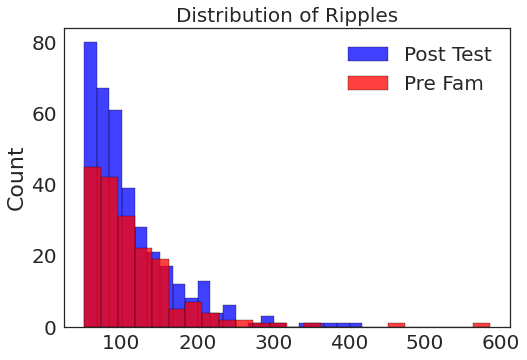

In [62]:
ax = plt.gca()
npl.setup(font_scale=2, style='white',\
         rc=({'axes.titlesize':20}))   
sns.histplot(postTest.lengths*1000, color='blue', label='Post Test')

sns.histplot(preFam.lengths*1000, color='red', label='Pre Fam')

ax.set_title("Distribution of Ripples")
plt.legend()

In [7]:
def loadUpData(prefix, rec, channels, verbose):
    # loadUpData: this function takes in the filepath and type of recording
    # ['preFamSleep', 'fam', 'postFamSleep', 'test', 'postTestSleep']
    # and generates a nelpy analog signal array

    ts = np.fromfile(prefix + rec + '_timestamps.raw', dtype = np.uint32)

    chdata = []
    for i in range(len(channels)):
        if(channels[i]<10):
            chdata.append(np.fromfile(prefix + rec + "_channels/ch.0" + str(channels[i]) + ".raw",dtype=np.int16)*0.195)
            if(verbose):
                print(prefix + rec + "_channels/ch.0" + str(channels[i]) + ".raw")
        else:
            chdata.append(np.fromfile(prefix + rec + "_channels/ch." + str(channels[i]) + ".raw",dtype=np.int16)*0.195)
            if(verbose):
                print(prefix + rec + "_channels/ch." + str(channels[i]) + ".raw")
    
    chdata = np.asarray(chdata)
    return nel.AnalogSignalArray(
    chdata,
    abscissa_vals=(ts-ts[0])/30000,
    )

prefix = '/home/kaylavokt/Desktop/Whrath/Day1/'
rec = rec_list[4]
channels = [27]
asa = loadUpData(prefix, rec, channels, True)
print(asa)

# 583 seconds

/home/kaylavokt/Desktop/Whrath/Day1/postTestSleep_channels/ch.27.raw


<AnalogSignalArray at 0x7f716e755588: 1 signals> for a total of 20:22:568 minutes


In [9]:
asa.time

array([0.00000000e+00, 3.33333333e-05, 6.66666667e-05, ...,
       1.22256873e+03, 1.22256877e+03, 1.22256880e+03])

In [11]:
nel.EpochArray([582,582])

<EpochArray at 0x7f716dabd278: 1 epoch> of length 0.0 milliseconds

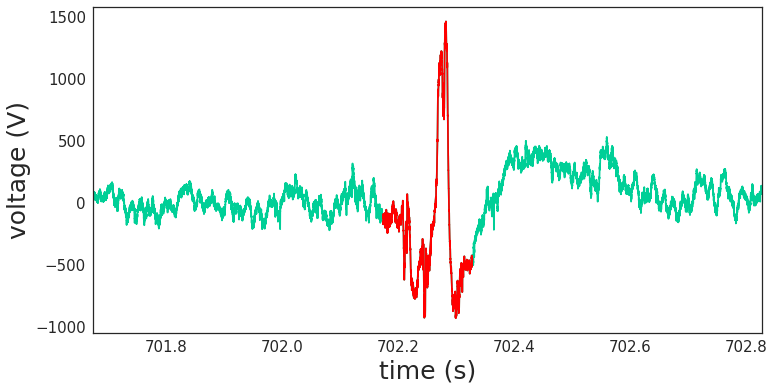

In [41]:
window = [581.5,584]
rippleNum = 184

ax = plt.gca()
# npl.plot(asa[nel.EpochArray(window)])
npl.plot(asa[epochs[rippleNum].expand(0.5)])
npl.plot(asa[epochs[rippleNum]], color='red')
# ax.set_xlim(window)


In [17]:
epochs = ripple_epochs[rec_list[4]][15]

In [ ]:
npl.plot(asa[nel.EpochArray([580,584])])

In [74]:
len(epochs.data)

366

In [73]:
num_epochs = len(epochs.data)
possible_join_ripples = []

for i in range(num_epochs-1):
    diff = epochs.data[i+1][1] - epochs.data[i][0]
    if diff <= .15: # 150ms
        possible_join_ripples.append([i, diff])
        
possible_join_ripples
    

[[209, 0.13200001435961894],
 [217, 0.1493333495832303],
 [221, 0.142000015450094],
 [222, 0.1436666822985444],
 [224, 0.13700001490485647],
 [232, 0.14400001566821174],
 [250, 0.12466668022636895]]

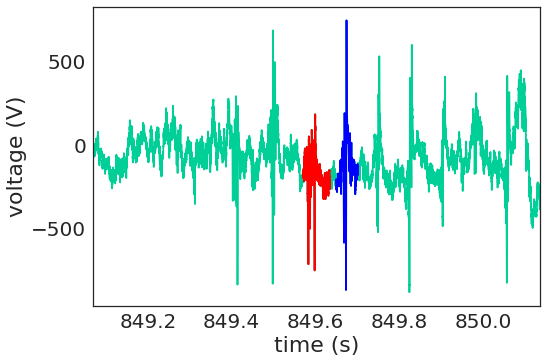

In [83]:
rippleNum = possible_join_ripples[0][0]

ax = plt.gca()
npl.plot(asa[epochs[rippleNum].expand(0.5)])
npl.plot(asa[epochs[rippleNum]], color='red')
npl.plot(asa[epochs[rippleNum+1]], color='blue')

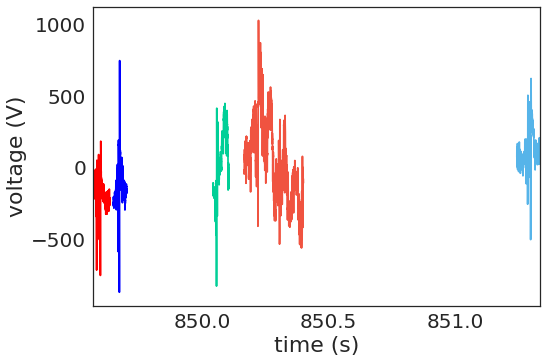

In [ ]:
npl.plot(asa[epochs[rippleNum]], color='red')
npl.plot(asa[epochs[rippleNum+1]], color='blue')
npl.plot(asa[epochs[rippleNum+2]])
npl.plot(asa[epochs[rippleNum+3]])
npl.plot(asa[epochs[rippleNum+4]])